In [1]:
# Import pyplot from matplotlib
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
import numpy as np
# Import stackoverflow data from csv
stackoverflow_data = pd.read_csv('stack-overflow-developer-survey-2021/survey_results_public.csv', index_col=0)
# print(stackoverflow_data.head())
print(stackoverflow_data.columns)
# print(stackoverflow_data.CompTotal.head())
print(np.sum(np.isnan(stackoverflow_data.ConvertedCompYearly)))

# Returning a dataframe where all the ConvertedCompYearly values are not null
stackoverflow_data_notnull = stackoverflow_data[pd.notna(stackoverflow_data.ConvertedCompYearly)].copy()

Index(['MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country',
       'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')
36595


In [3]:
# Make y the median ConvertedCompYearly values for age ranges in group

# Split stackoverflowdata_notnull according to age
age_split_data = stackoverflow_data_notnull.groupby('Age')
# Apply median to each group
medians = age_split_data.median()
print(medians)
dev_y = medians.ConvertedCompYearly.array

# Make x the number of age groups ,same as the number of rows in medians
dev_x = np.arange(medians.shape[0])

print(dev_x, dev_y)

                    CompTotal  ConvertedCompYearly
Age                                               
18-24 years old       35000.0              22800.0
25-34 years old       65000.0              51563.5
35-44 years old       80000.0              76967.0
45-54 years old       95000.0              92052.0
55-64 years old      100000.0             108000.0
65 years or older    100000.0             103500.0
Prefer not to say     70000.0              83194.0
Under 18 years old     3400.0              11658.0
[0 1 2 3 4 5 6 7] <PandasArray>
[22800.0, 51563.5, 76967.0, 92052.0, 108000.0, 103500.0, 83194.0, 11658.0]
Length: 8, dtype: float64


/tmp/ipykernel_7352/1514340981.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = age_split_data.median()


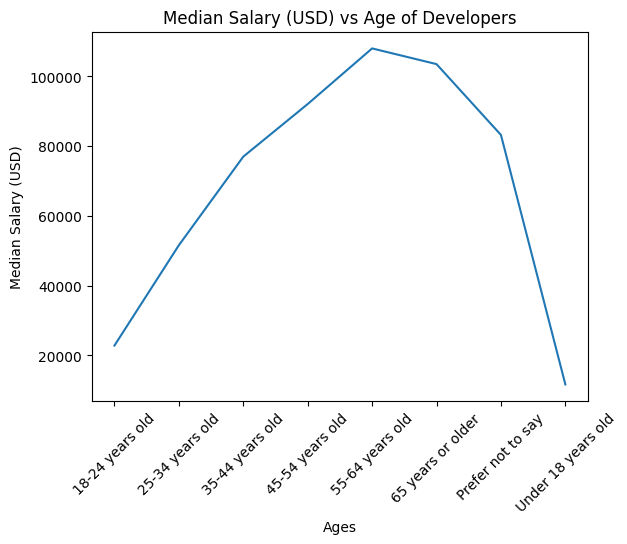

<Figure size 640x480 with 0 Axes>

In [4]:
# Plotting dev_x and dev_y
plt.plot(dev_x, dev_y)

# Adding data to plot
plt.title('Median Salary (USD) vs Age of Developers')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.xticks(ticks=dev_x, labels=medians.index, rotation=45)

# Showing the plot
plt.show()

# Clearing the plot
plt.clf()

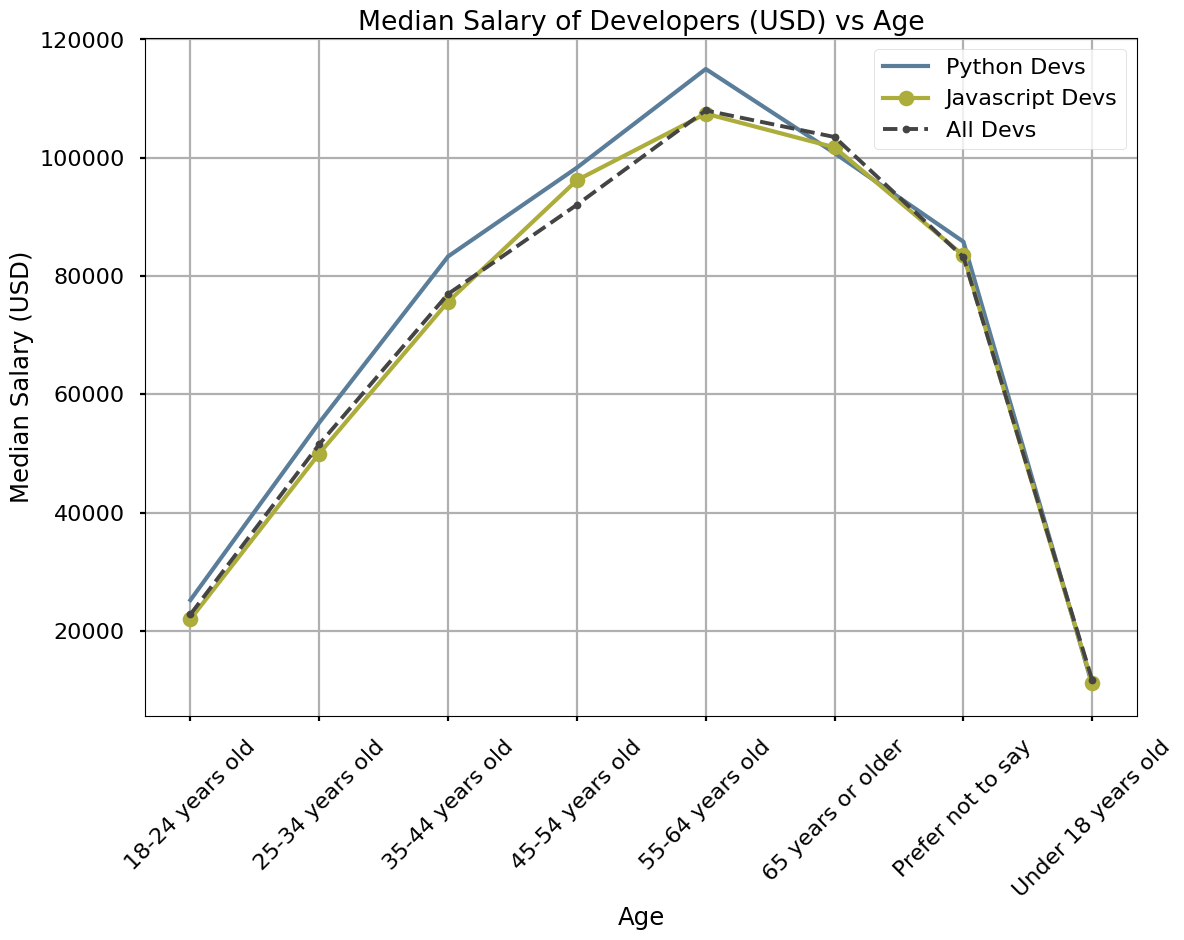

<Figure size 1280x880 with 0 Axes>

In [5]:
# Create a plot of median salary of Python Developers vs Age

# Remove entries where LanguageHaveWorkedWith is null
stackoverflow_languages = stackoverflow_data_notnull[pd.notna(stackoverflow_data_notnull.LanguageHaveWorkedWith)].copy()

# Split LanguageHaveWorkedWith column with ;
# Create a function that accepts a string and character to split by
def stringSplit(x:str, sep:str):
    """
    Splits a string x with char sep and returns a list of split text blocks
    """
    return x.split(sep)

# Turns LanguageHaveWorkedWith column into a list of characters
stackoverflow_languages.LanguageHaveWorkedWith = stackoverflow_languages.LanguageHaveWorkedWith.apply(stringSplit, args=(';'))

# Create a function for searching for Python in each entry in the dataframe
def searchString(*el:list, x:str):
    """ 
    Searches for x in el and returns a boolean indicating if x was in el
    """
    return x in el[0]
# Get dataframe with only Python developers
python_developers = stackoverflow_languages[stackoverflow_languages.LanguageHaveWorkedWith.apply(searchString, x='Python').array].copy()
javascript_developers = stackoverflow_languages[stackoverflow_languages.LanguageHaveWorkedWith.apply(searchString, x='JavaScript').array].copy()

# Group by age and find medians
python_developers_salaries = python_developers.groupby('Age').median(numeric_only=True)
javascript_developers_salaries = javascript_developers.groupby('Age').median(numeric_only=True)

# Plot
python_y_vals = python_developers_salaries.ConvertedCompYearly.array
python_x_vals = np.arange(python_developers_salaries.shape[0])
javascript_y_vals = javascript_developers_salaries.ConvertedCompYearly.array
javascript_x_vals = np.arange(javascript_developers_salaries.shape[0])

# Plotting
# Changing style of plot

plt.style.use('seaborn-poster')
plt.plot(python_x_vals, python_y_vals, color='#5a7d9a', marker='x', linewidth=3, label='Python Devs')
plt.plot(javascript_x_vals, javascript_y_vals, color='#adad3b', marker='o', linewidth=3, label='Javascript Devs')
plt.plot(dev_x, dev_y, color='#444444', linestyle='--', marker='.', label='All Devs')

# Decorating plot
plt.title('Median Salary of Developers (USD) vs Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.xticks(dev_x, labels=python_developers_salaries.index, rotation=45)
plt.legend()
plt.grid(True)

# Showing plot
plt.show()
plt.clf()

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


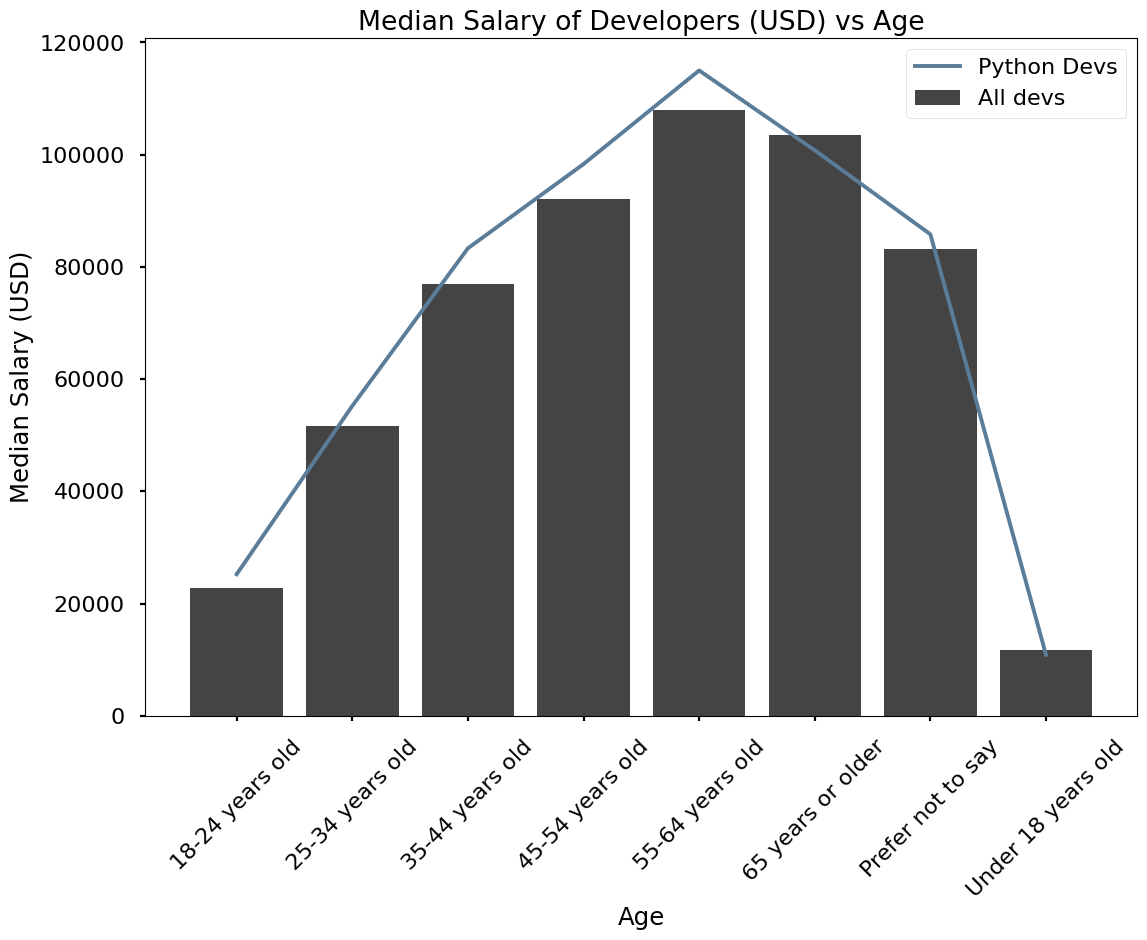

<Figure size 1280x880 with 0 Axes>

In [7]:
# Plotting combined line and bar graph

plt.plot(python_x_vals, python_y_vals, color='#5a7d9a', label='Python Devs')
plt.bar(dev_x, dev_y, color='#444444', label='All devs')

plt.title('Median Salary of Developers (USD) vs Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.xticks(dev_x, labels=python_developers_salaries.index, rotation=45)
plt.legend()

plt.show()
plt.clf()

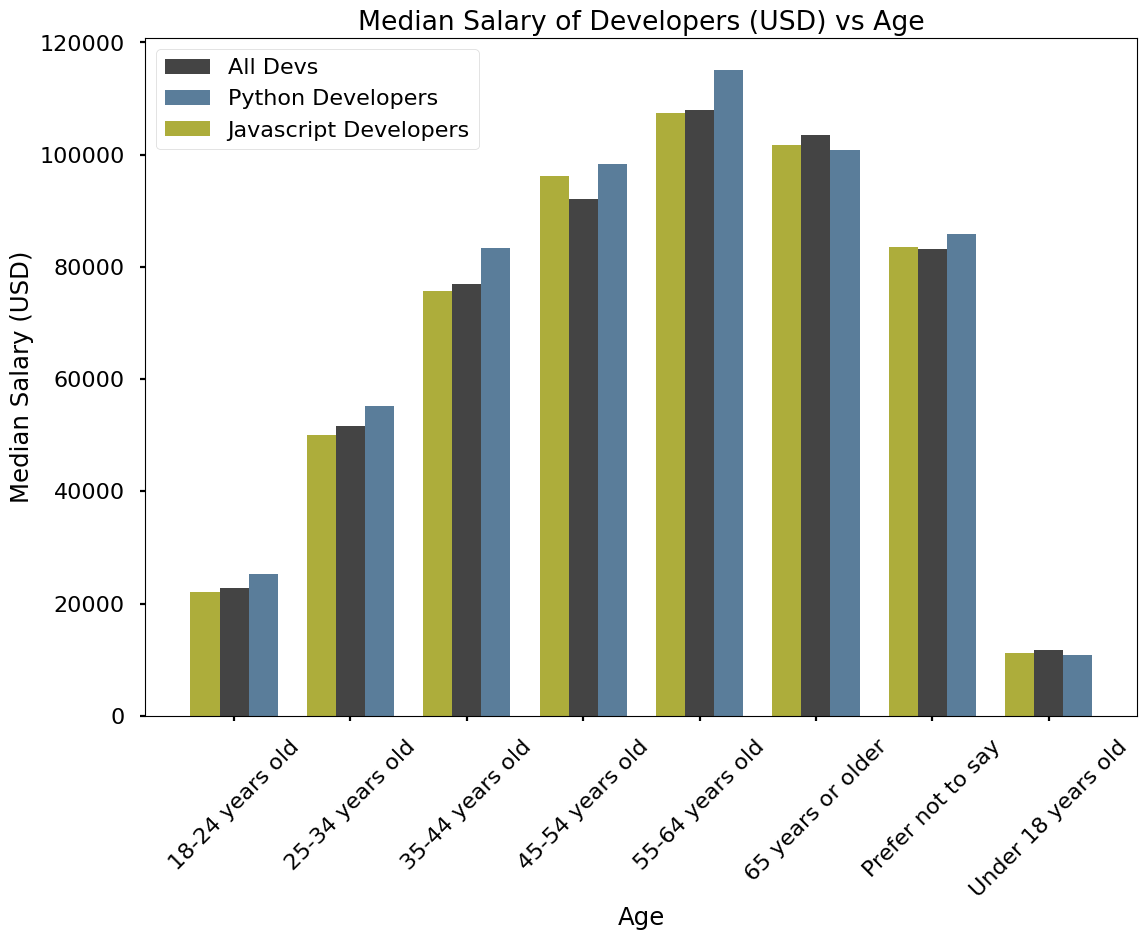

<Figure size 1280x880 with 0 Axes>

In [8]:
# Plotting multiple bar graphs
import numpy as np

# This is achived by shifting the x values by width of bars
bar_width = 0.25

plt.bar(dev_x, dev_y, width=bar_width, color='#444444', label='All Devs')
plt.bar(dev_x + bar_width, python_y_vals, width=bar_width, color='#5a7d9a', label='Python Developers')
plt.bar(dev_x - bar_width, javascript_y_vals, width=bar_width, color='#adad3b', label='Javascript Developers')

plt.title('Median Salary of Developers (USD) vs Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.xticks(dev_x, labels=python_developers_salaries.index, rotation=45)
plt.legend()


plt.show()
plt.clf()

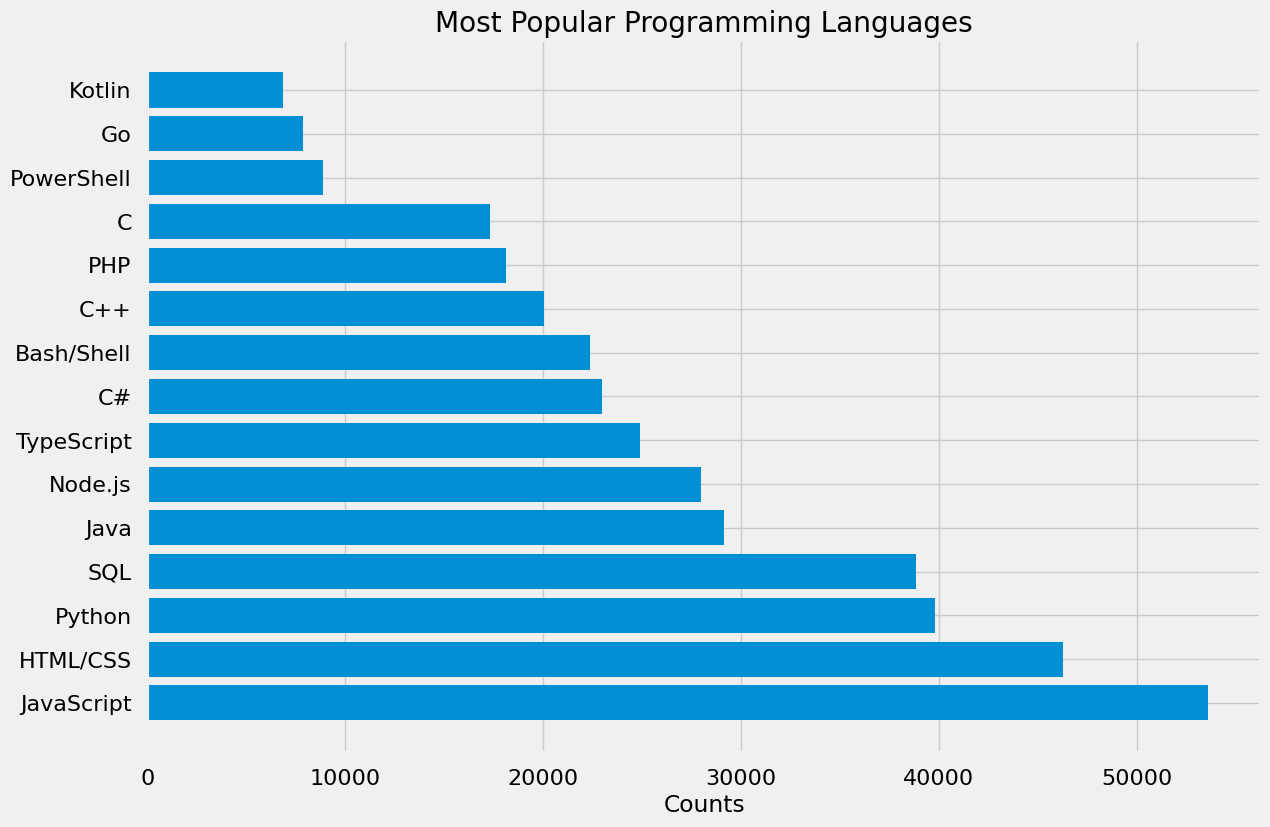

<Figure size 1280x880 with 0 Axes>

In [9]:
# Getting dataframe made up of rows sith LanguagesHaveWorkedWith
languages_df = stackoverflow_data[pd.notna(stackoverflow_data.LanguageHaveWorkedWith)].copy()
languages_df.LanguageHaveWorkedWith = languages_df.LanguageHaveWorkedWith.apply(stringSplit, sep=';')

# Getting values of most popular languges
# Get series of languages used
language_array = languages_df.LanguageHaveWorkedWith.array

# Iterate over all items in series as I update a counter
# Create a default dict to keep count of every element
from collections import Counter
counter = Counter() 

# Iterate over every list in language_array
for arr in language_array:
    counter.update(arr)

counter_most_common = counter.most_common(15)
languages, count =  zip(*counter_most_common)


# print(languages, count)

# Plotting bar graph
plt.style.use('fivethirtyeight')

plt.barh(languages, count)

plt.title('Most Popular Programming Languages')
# plt.ylabel('Programming Language')
plt.xlabel('Counts')

plt.show()
plt.clf()

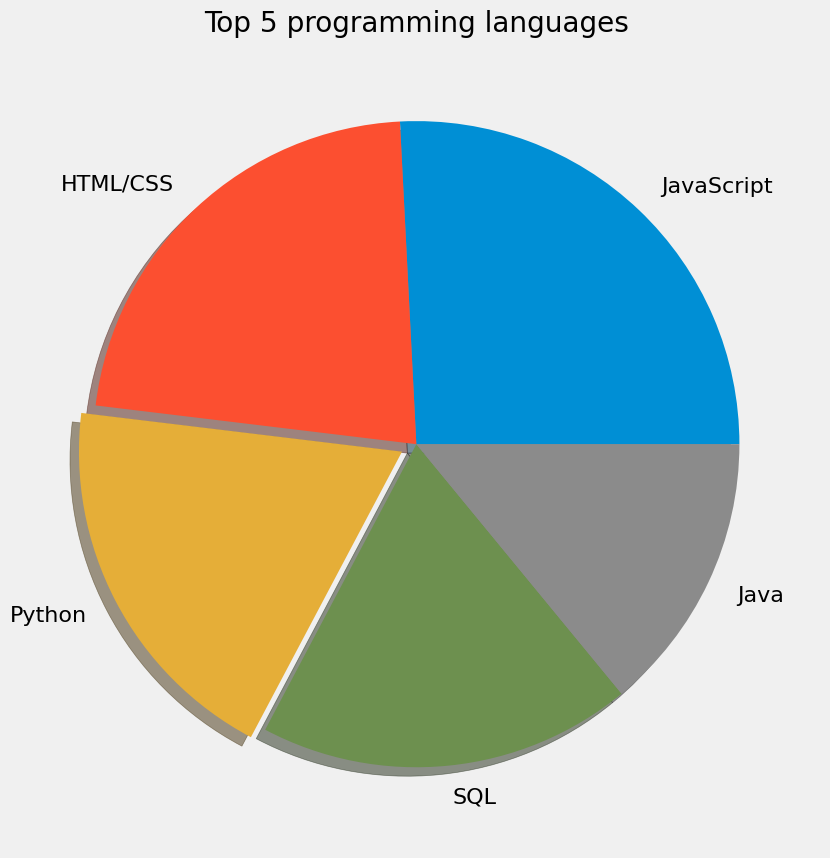

<Figure size 1280x880 with 0 Axes>

In [18]:
# Making a pie chart of most used programming languages
plt.pie(count[:5], labels=languages[:5], explode=[0, 0, 0.05, 0, 0], shadow=True)

plt.title('Top 5 programming languages')
plt.tight_layout()
plt.show()
plt.clf()

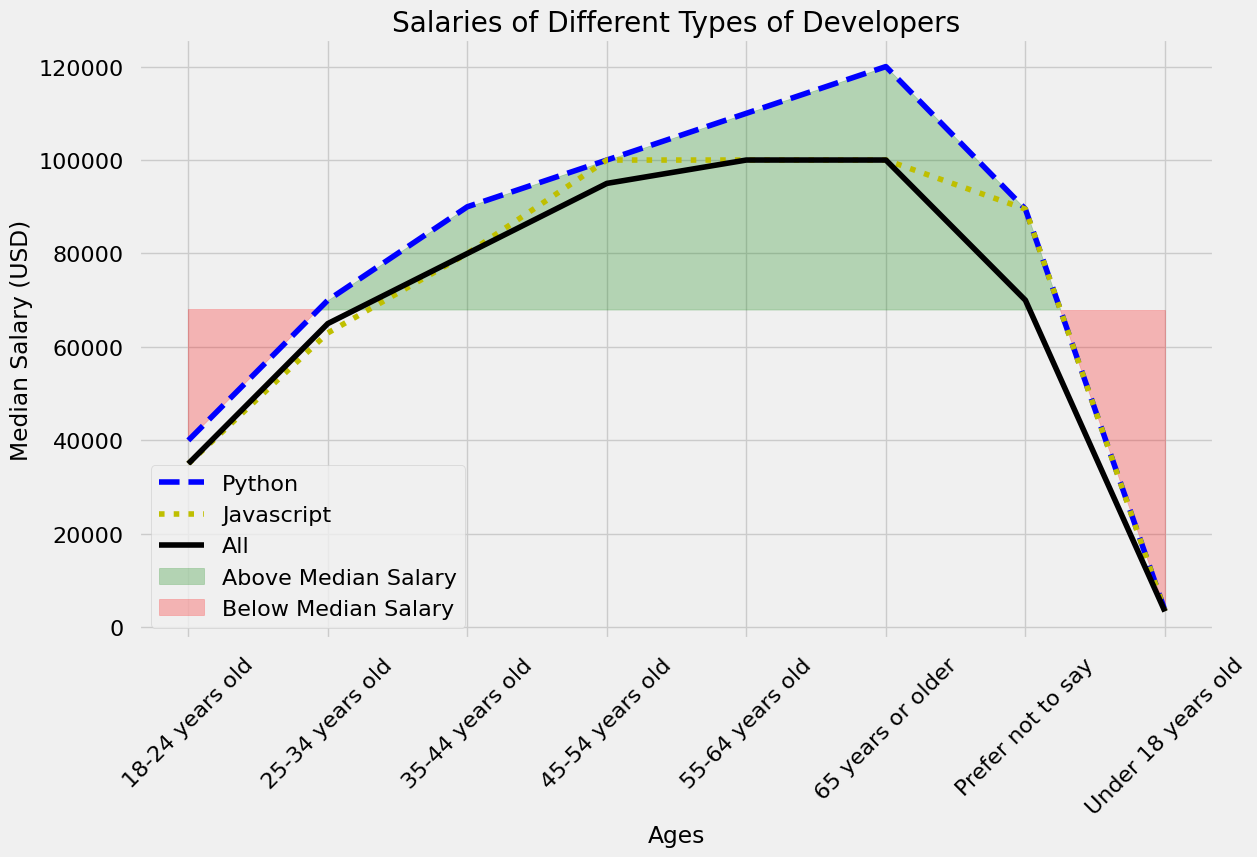

<Figure size 1280x880 with 0 Axes>

In [40]:
# print(medians.head())
# print(python_developers_salaries.head())
# print(javascript_developers_salaries.head())
overall_median = stackoverflow_data_notnull.CompTotal.median()
ages = medians.index
plt.plot(ages, python_developers_salaries.CompTotal, linestyle='--', color='b', label='Python')
plt.plot(ages, javascript_developers_salaries.CompTotal, linestyle='dotted', color='y', label='Javascript')
plt.plot(ages, medians.CompTotal, color='k', label="All")

plt.title('Salaries of Different Types of Developers')
plt.ylabel('Median Salary (USD)')
plt.xlabel('Ages')
plt.tight_layout()
plt.xticks(np.arange(medians.shape[0]), medians.index, rotation=45)

plt.fill_between(ages, overall_median, python_developers_salaries.CompTotal, alpha=0.25, color='g',
                 where=(python_developers_salaries.CompTotal > overall_median), interpolate=True, label='Above Median Salary')
plt.fill_between(ages, overall_median, python_developers_salaries.CompTotal, color='r', alpha=0.25,
                where=(python_developers_salaries.CompTotal < overall_median), interpolate=True, label='Below Median Salary')

plt.legend()
plt.tight_layout()

plt.show()
plt.clf()